# Netflix - EDA (Exploratory Data Analysis)

In [1]:
# Importing neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing Dataset:
import os
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

In [3]:
# Checking the shape of the dataset:
df.shape

(15480, 29)

In [4]:
df.head(3)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube


# We observed that the columns name are not following INC rules

In [5]:
# Renaming  inconsistent column names
df.columns=df.columns.str.replace(" ","_")

In [6]:
# checking duplicate values:
df.duplicated().sum()

np.int64(0)

In [7]:
# checking null values:
df.isna().sum()/len(df)*100

Title                     0.000000
Genre                    11.046512
Tags                      0.432817
Languages                12.622739
Series_or_Movie           0.000000
Hidden_Gem_Score         13.572351
Country_Availability      0.122739
Runtime                   0.006460
Director                 30.413437
Writer                   27.971576
Actors                   12.435401
View_Rating              45.374677
IMDb_Score               13.559432
Rotten_Tomatoes_Score    58.772610
Metacritic_Score         71.989664
Awards_Received          60.755814
Awards_Nominated_For     50.510336
Boxoffice                74.114987
Release_Date             13.611111
Netflix_Release_Date      0.000000
Production_House         66.737726
Netflix_Link              0.000000
IMDb_Link                14.877261
Summary                   0.058140
IMDb_Votes               13.572351
Image                     0.000000
Poster                   23.501292
TMDb_Trailer             53.527132
Trailer_Site        

### We removed irrelevant columns containing many missing values such as Trailer_Site, Boxoffice  image URLs, Posters URLs etc as they do not contribute meaningful insights to the analysis.


In [8]:
df=df.drop(columns=['Netflix_Link','IMDb_Link','Summary','Image','Poster','TMDb_Trailer','Metacritic_Score',
                    'Production_House','Trailer_Site','Boxoffice'],axis=1)

In [9]:
# dropping null values :
df=df.dropna(how="any").reset_index(drop=True)

In [10]:
df.shape

(3082, 19)

In [11]:
# Checking datatypes of the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  3082 non-null   object 
 1   Genre                  3082 non-null   object 
 2   Tags                   3082 non-null   object 
 3   Languages              3082 non-null   object 
 4   Series_or_Movie        3082 non-null   object 
 5   Hidden_Gem_Score       3082 non-null   float64
 6   Country_Availability   3082 non-null   object 
 7   Runtime                3082 non-null   object 
 8   Director               3082 non-null   object 
 9   Writer                 3082 non-null   object 
 10  Actors                 3082 non-null   object 
 11  View_Rating            3082 non-null   object 
 12  IMDb_Score             3082 non-null   float64
 13  Rotten_Tomatoes_Score  3082 non-null   float64
 14  Awards_Received        3082 non-null   float64
 15  Awar

In [12]:
df.Release_Date=pd.to_datetime(df.Release_Date)

In [13]:
df.Netflix_Release_Date = pd.to_datetime(df.Netflix_Release_Date)

# Overview of the Dataset:

In [14]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Hidden_Gem_Score,3082.0,3.920539,0.6,2.9,3.7,4.3,8.9,1.60112
IMDb_Score,3082.0,6.775341,1.7,6.3,6.85,7.4,9.3,0.907984
Rotten_Tomatoes_Score,3082.0,66.843608,0.0,50.25,73.0,87.0,100.0,24.803222
Awards_Received,3082.0,11.688514,1.0,2.0,4.0,11.0,300.0,22.454086
Awards_Nominated_For,3082.0,22.49708,1.0,4.0,10.0,23.0,355.0,37.428007
Release_Date,3082,2007-11-09 14:51:56.417910528,1925-07-13 00:00:00,2003-07-02 18:00:00,2011-06-13 12:00:00,2016-02-19 00:00:00,2020-08-26 00:00:00,NaN
Netflix_Release_Date,3082,2017-02-03 07:47:41.778066176,2015-04-14 00:00:00,2015-04-14 00:00:00,2016-04-01 00:00:00,2018-10-22 18:00:00,2021-03-04 00:00:00,NaN
IMDb_Votes,3082.0,143424.749189,65.0,13515.0,63486.5,185206.75,2354197.0,221111.783258


##  Outliers Detection and treatment

In [15]:
cont_df=df.select_dtypes(include='number')

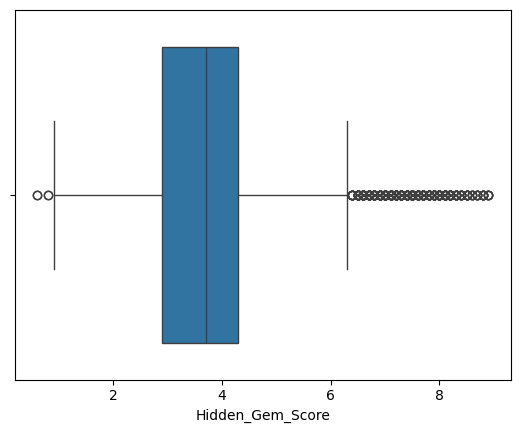

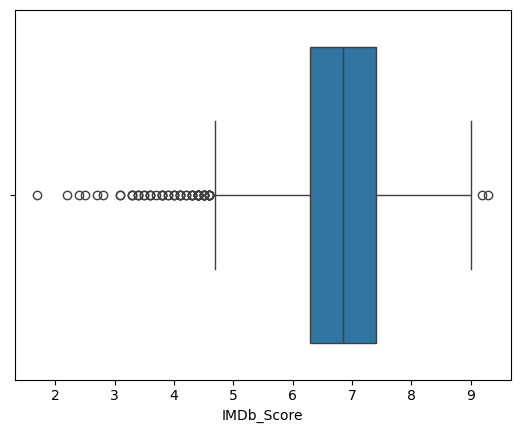

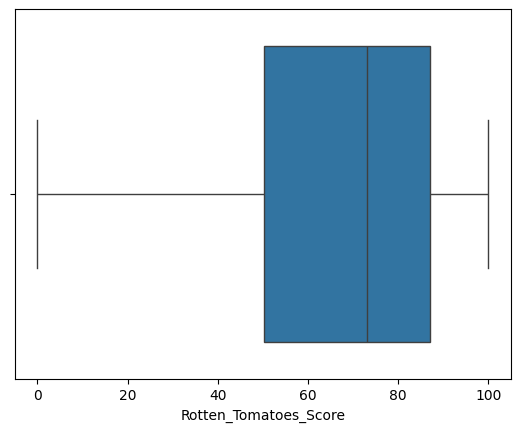

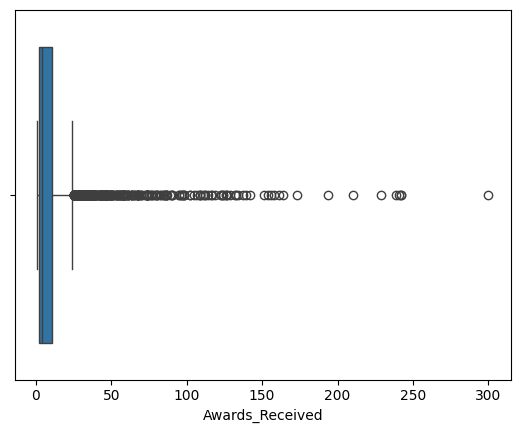

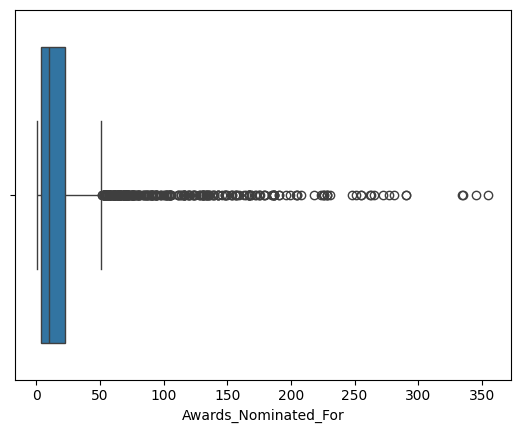

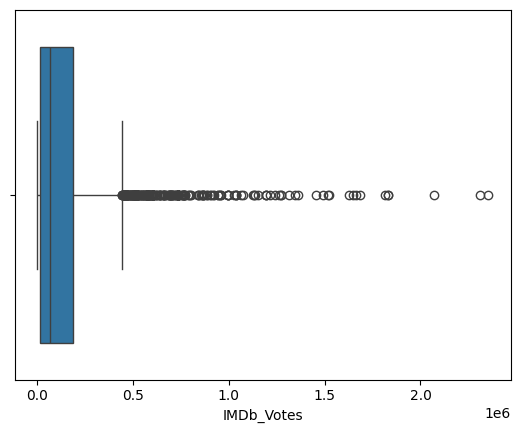

In [16]:
for i in cont_df.columns:
    sns.boxplot(data=cont_df,x=i)
    plt.show()

In [17]:
# Treating outliers with IQR method:
for i in cont_df.columns:
    q1=cont_df[i].quantile(0.25)
    q3=cont_df[i].quantile(0.75)
    iqr=q3-q1
    l=q1-(1.5*iqr)
    u=q3+(1.5*iqr)
    df[i]=df[i].clip(lower=l,upper=u)

## Adding row_number as Id column in the Dataset:

In [18]:
count= pd.Series(range(1,len(df)+1))

In [19]:
df.insert(0,'ID',count)

## Checking correlations between columns:

In [20]:
corr=cont_df.corr()

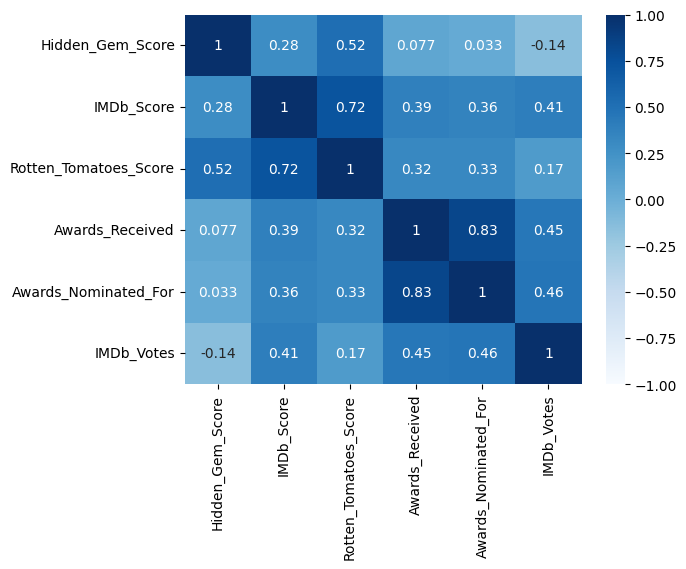

In [21]:
sns.heatmap(data=corr,vmin=-1,vmax=1,annot=True,cmap="Blues")
plt.show()

# Observations:
### 1.Columns naming Awards_received has highly positive correlation with Awards_Nominated_for
### 2.Columns naming IMDb_score has positive correlation with Rotten_Tomatoes_Score

### spliting and exploding the column name "Genre"

In [22]:
# Step 1: Split the genre string into lists
df["Genre"] = df["Genre"].str.split(",")

# Step 2: Remove leading/trailing whitespace
df["Genre"] = df["Genre"].apply(lambda x: [g.strip() for g in x])

# Step 3: Explode the genre column
df_final = df.explode("Genre").reset_index(drop=True)


In [23]:
df_final.to_excel('netflix_EDA_data.xlsx')